# GARCH Model

In [9]:
pip install pandas numpy statsmodels arch matplotlib

Note: you may need to restart the kernel to use updated packages.


## Data Preprocessing

In [10]:
import pandas as pd
import numpy as np

# Load Reliance.csv
data = pd.read_csv('RELIANCE.csv', parse_dates=['Date'], index_col='Date')
# Use closing prices and compute returns for volatility
prices = data['Close']
returns = prices.pct_change().dropna()

In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

## Model Specification

In [12]:
from arch import arch_model

# Specify GARCH(1,1) on returns
model_garch = arch_model(returns * 100, vol='Garch', p=1, q=1, dist='Normal')


## Fit and Forecast

In [13]:
# Fit the model
result_garch = model_garch.fit(update_freq=5)
print(result_garch.summary())

# Forecast one-day-ahead volatility
garch_forecast = result_garch.forecast(horizon=1)
# Extract conditional variance and convert back to volatility
cond_var = garch_forecast.variance.iloc[-1, 0]
cond_vol = np.sqrt(cond_var) / 100  # back to original scale
print('Next-day GARCH Volatility:', cond_vol)

Iteration:      5,   Func. Count:     35,   Neg. LLF: 13864.578634609403
Optimization terminated successfully    (Exit mode 0)
            Current function value: 11853.943355780197
            Iterations: 9
            Function evaluations: 57
            Gradient evaluations: 9
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -11853.9
Distribution:                  Normal   AIC:                           23715.9
Method:            Maximum Likelihood   BIC:                           23742.2
                                        No. Observations:                 5305
Date:                Thu, Jun 19 2025   Df Residuals:                     5304
Time:                        16:54:13   Df Model:                            1
        

## Visualization

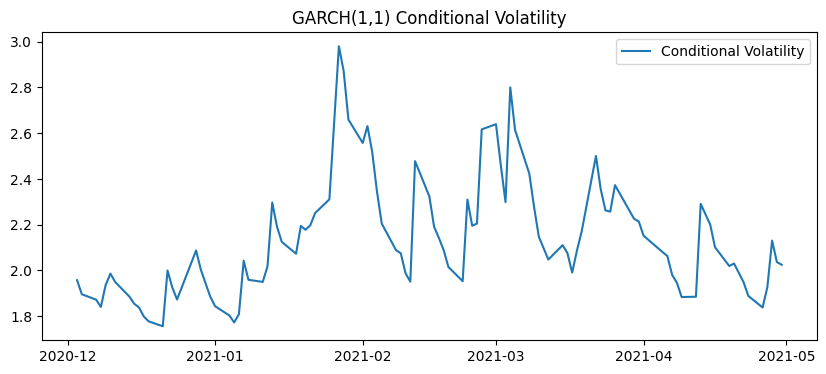

In [14]:
import matplotlib.pyplot as plt

# Plot conditional volatility
plt.figure(figsize=(10, 4))
plt.plot(result_garch.conditional_volatility[-100:], label='Conditional Volatility')
plt.title('GARCH(1,1) Conditional Volatility')
plt.legend()
plt.show()


## Metrics

In [15]:
import pandas as pd
import numpy as np
from arch import arch_model
from sklearn.metrics import mean_absolute_error, mean_squared_error
from scipy.stats import pearsonr

# Load data and compute returns
data = pd.read_csv('RELIANCE.csv', parse_dates=['Date'], index_col='Date')
prices = data['Close']
returns = prices.pct_change().dropna()

# Fit GARCH(1,1) model
garch = arch_model(returns * 100, vol='Garch', p=1, q=1, dist='Normal')
res = garch.fit(update_freq=0, disp='off')

# Obtain conditional volatility forecasts
vol_forecast = res.conditional_volatility / 100  # Convert back to original scale

# Compute realized volatility (squared returns as proxy)
realized_vol = np.abs(returns)  # Absolute returns as volatility proxy

# Align the series
min_length = min(len(vol_forecast), len(realized_vol))
vol_pred = vol_forecast.iloc[-min_length:].values
vol_true = realized_vol.iloc[-min_length:].values

# Calculate accuracy metrics
mae = mean_absolute_error(vol_true, vol_pred)
rmse = np.sqrt(mean_squared_error(vol_true, vol_pred))

# Correlation coefficient as accuracy measure
correlation, p_value = pearsonr(vol_true, vol_pred)

# Directional accuracy (percentage of correct volatility direction predictions)
vol_true_direction = np.diff(vol_true) > 0
vol_pred_direction = np.diff(vol_pred) > 0
directional_accuracy = np.mean(vol_true_direction == vol_pred_direction)

print(f"GARCH Model Accuracy Metrics:")
print(f"  Correlation (Accuracy)   : {correlation:.4f}")
print(f"  Directional Accuracy     : {directional_accuracy:.4f}")
print(f"  Mean Absolute Error (MAE): {mae:.4f}")
print(f"  Root MSE (RMSE)          : {rmse:.4f}")

GARCH Model Accuracy Metrics:
  Correlation (Accuracy)   : 0.2066
  Directional Accuracy     : 0.3086
  Mean Absolute Error (MAE): 0.0138
  Root MSE (RMSE)          : 0.0205
